## LIFE PATTERN PREDICTION SYSTEM

***Import analysis and visualization packages***

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

***Import and Explore the data***

In [4]:
df=pd.read_csv('/content/life_patterns.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


***DATA SCHEMA***

In [5]:
#Country

#Year:Years from 2000 to 2015

#Status:Developed or Developing status

#Life expectancy:Life Expectancy in age

#Adult Mortality:Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

#infant deaths:Number of Infant (Between 0 and 2 years) Deaths  per 1000 population

#Alcohol:Alcohol recorded per capita (15+) consumption (in litres of pure alcohol)

#percentage expenditure:Expenditure on health as a percentage of Gross Domestic Product per capita(%)

#Hepatitis B:(HepB) immunization coverage among 1-year-olds (%)

#Measles: number of reported cases per 1000 population

#BMI:Average Body Mass Index of entire population (weight in kg/(height in m)^2 )

#under-five deaths:Number of under-five deaths per 1000 population

#Polio:Polio (Pol3) immunization coverage among 1-year-olds (%)

#Total expenditure:General government expenditure on health as a percentage of total government expenditure (%)

#Diphtheria:Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

#HIV/AIDS:Deaths per 1 000 live births HIV/AIDS (0-4 years)

#GDP:Gross Domestic Product per capita (in USD)

#Population:Population of the country

#thinness 1-19 years:Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

#thinness 5-9 years:Prevalence of thinness among children for Age 5 to 9(%)

#Income composition of resources:Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

#Schooling:Number of years of Schooling(years)

#Immunization columns:Polio,Diphtheria,Hepatitis B


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

***Remove spaces from column names for ease of use***

In [7]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

***Exploring null values***

In [8]:
df.isna().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

***Finding out the percentage of null values***

In [9]:
missing_values_percentage = df.isnull().sum() / len(df) * 100
missing_values_percentage

Country                          0.000000
Year                             0.000000
Status                           0.000000
Lifeexpectancy                   0.340368
AdultMortality                   0.340368
infantdeaths                     0.000000
Alcohol                          6.603131
percentageexpenditure            0.000000
HepatitisB                      18.822328
Measles                          0.000000
BMI                              1.157250
under-fivedeaths                 0.000000
Polio                            0.646698
Totalexpenditure                 7.692308
Diphtheria                       0.646698
HIV/AIDS                         0.000000
GDP                             15.248468
Population                      22.191967
thinness1-19years                1.157250
thinness5-9years                 1.157250
Incomecompositionofresources     5.684139
Schooling                        5.547992
dtype: float64

In [10]:
#There are 2 diffrent aproaches in dealing with null values

#Drop the null values how ever we cant just drop more than 5% of our data

#The Right Solution is imputing the missing values with the right parameters

#We will deal with them later in preprocessing

In [11]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [12]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [13]:
df=df[df["Country"].str.contains("Israel")==False]

***Explore Duplicated Data***

In [14]:
df.duplicated().sum()

0

In [15]:
# Hence we can conclude that each row in our data is unique

***Splitting the Data***

In [16]:
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

 ***Visualization***

It is important to split the data as early as possible before visualizing or training our data
so we split the data to not peek at the test data and our minds could see a pattern and get biased for certain column

In [17]:
#Before Visualizing out data we could group our neumerical and categorical columns first for the ease of operating out plots

num_col=[]
cat_col=[]
for col in df_train.columns:
    if df_train[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col)
print(cat_col)
print(num_col)

['Country', 'Status']
['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


***Visualize The Life expectancy column The "Target"***

<Axes: xlabel='Lifeexpectancy'>

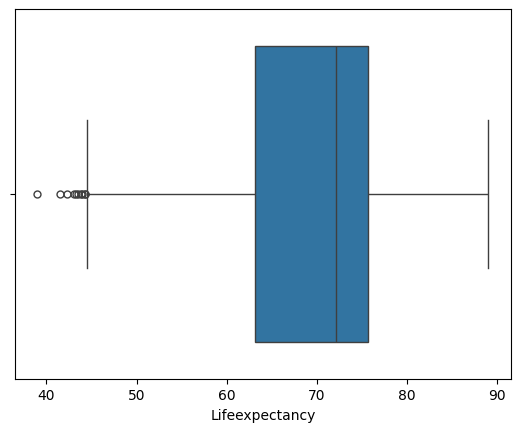

In [18]:
sns.boxplot(data=df_train,x='Lifeexpectancy',fliersize=5)

<Axes: xlabel='Lifeexpectancy', ylabel='Count'>

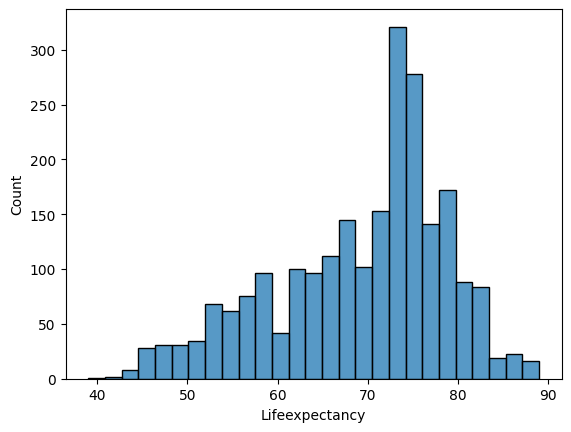

In [19]:
sns.histplot(data=df_train,x='Lifeexpectancy')

***Plot the Numerical columns***

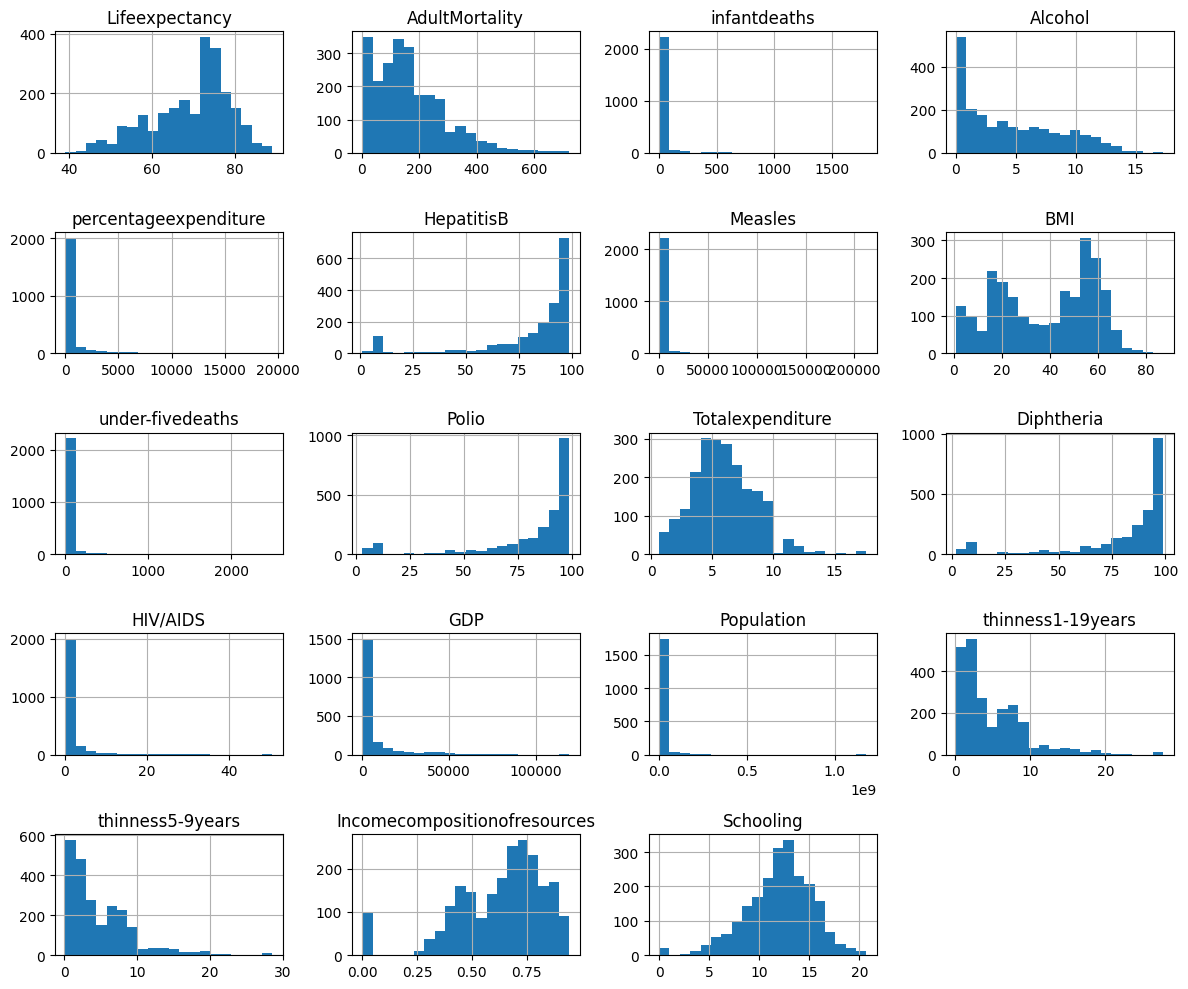

In [20]:
df_train[num_col].drop(columns='Year').hist(bins=20,figsize=(12,10))
plt.tight_layout()
plt.show()

***Univariate Analysis***

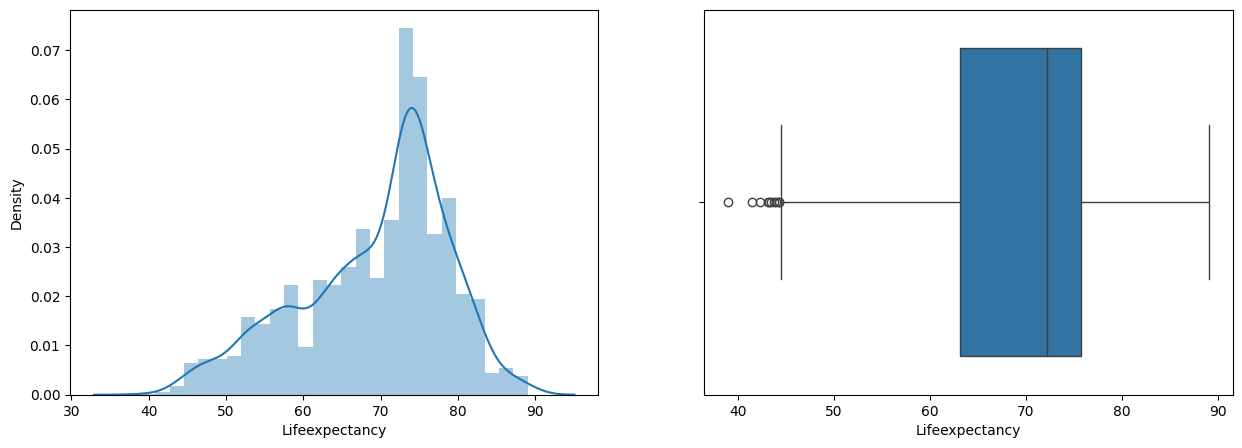

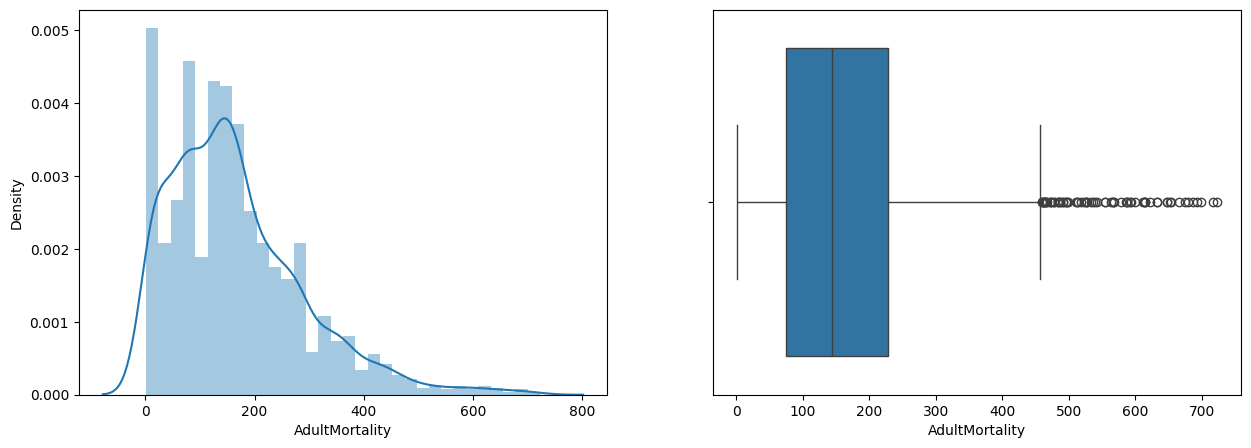

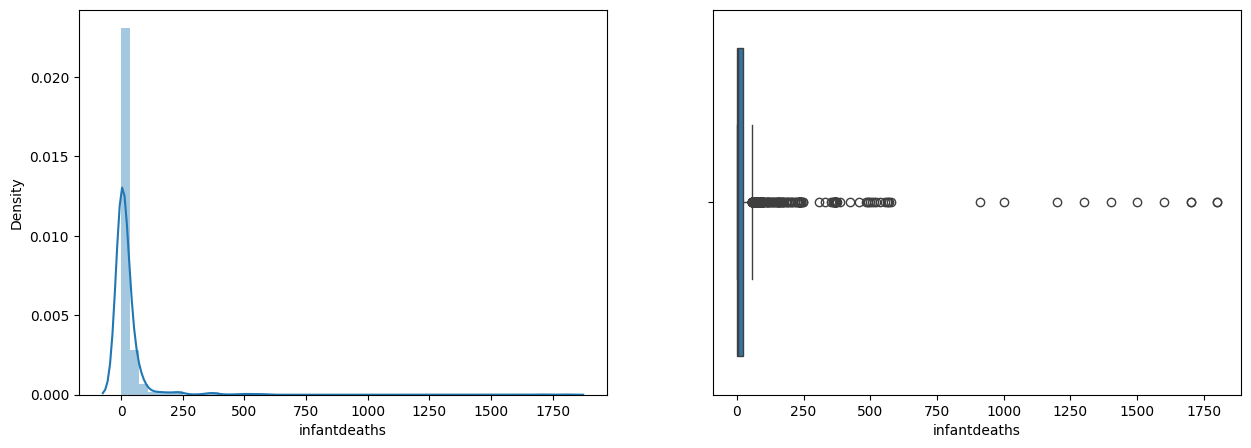

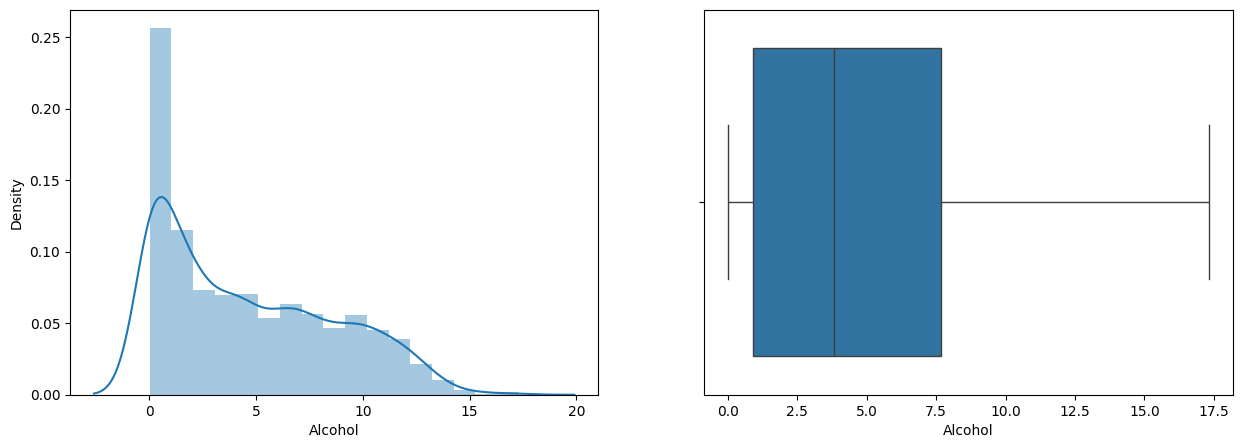

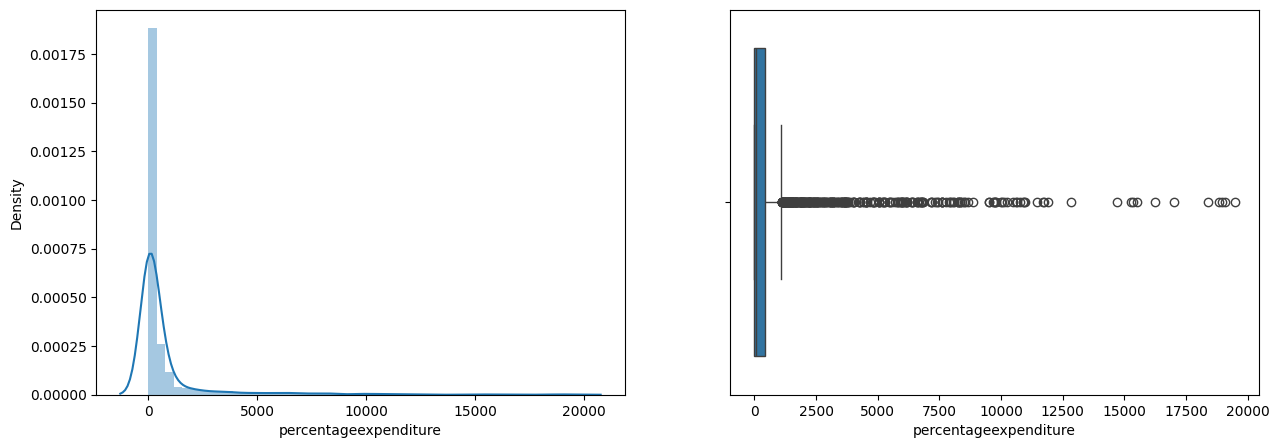

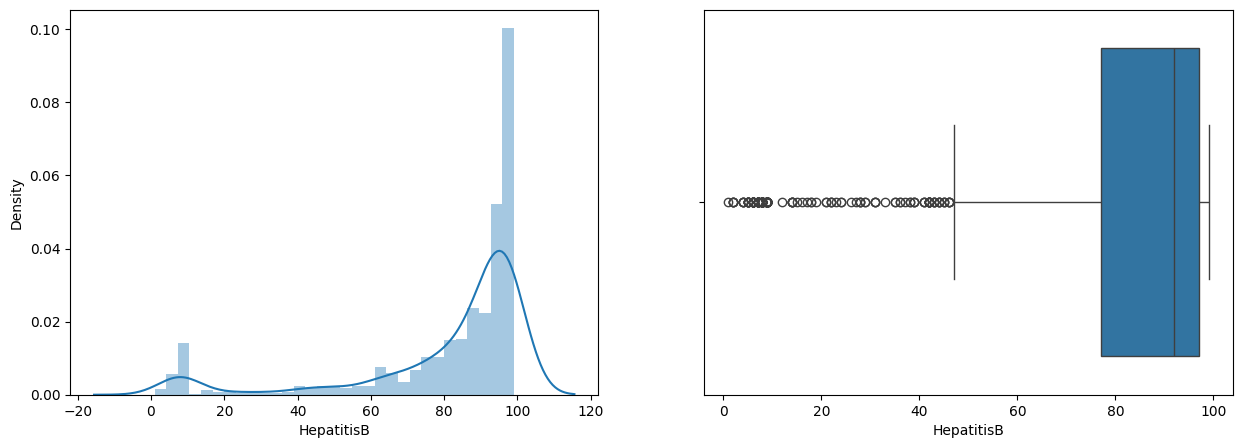

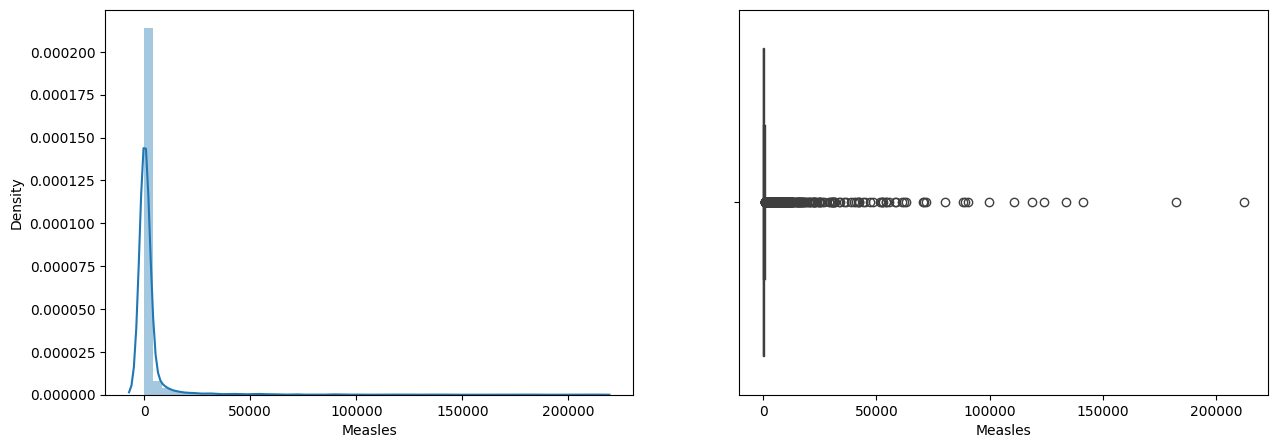

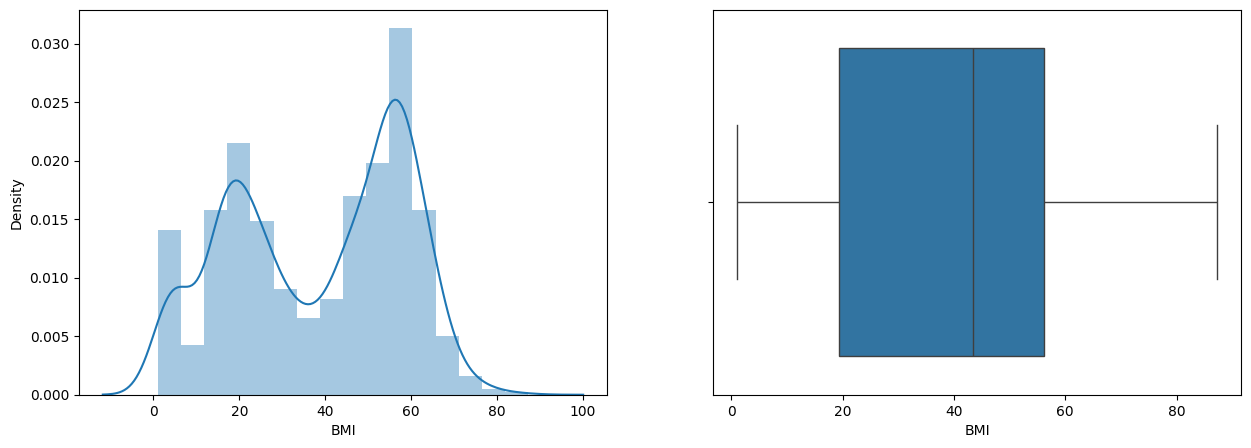

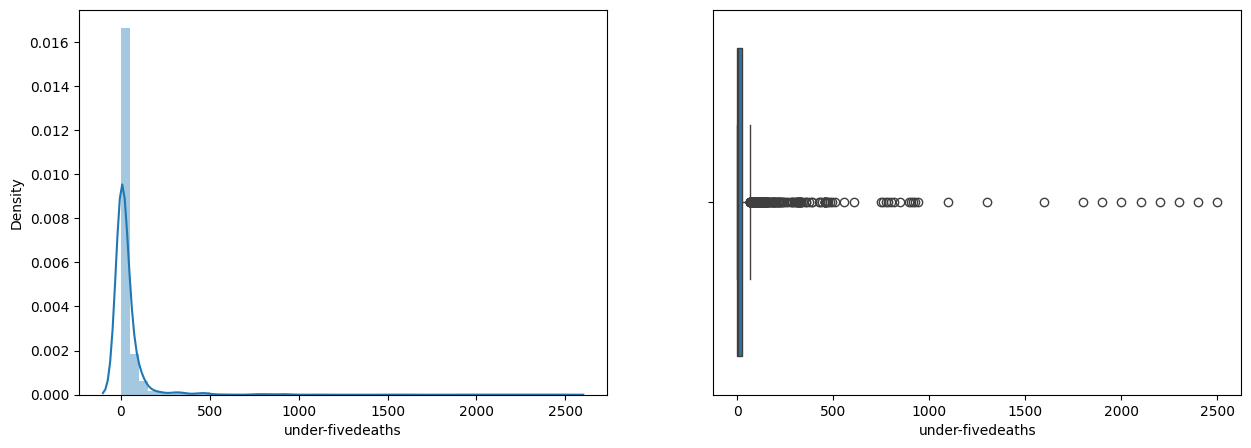

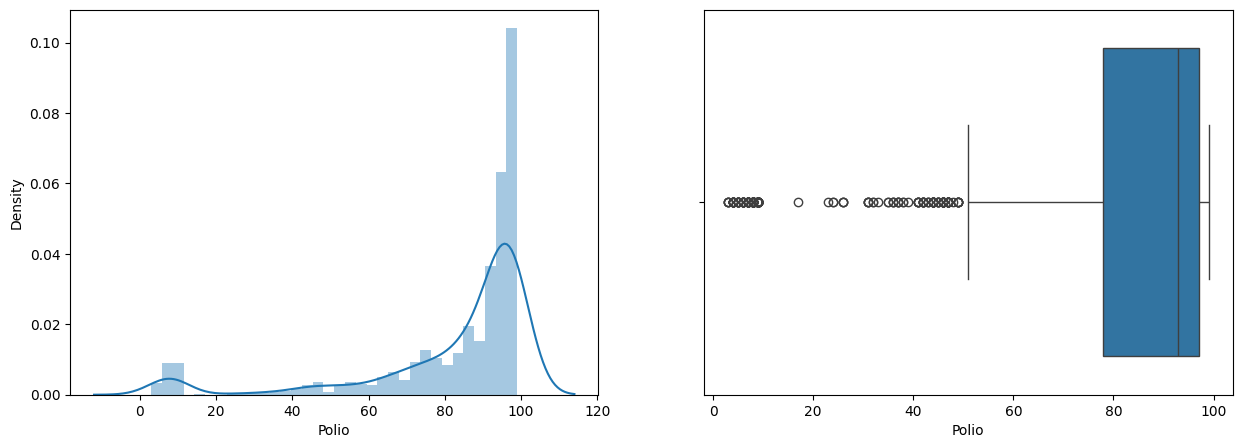

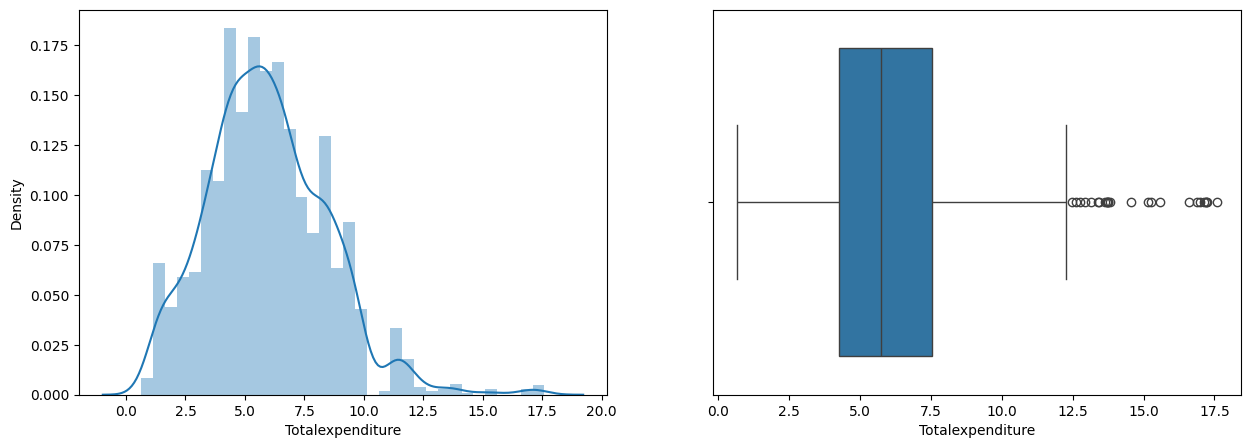

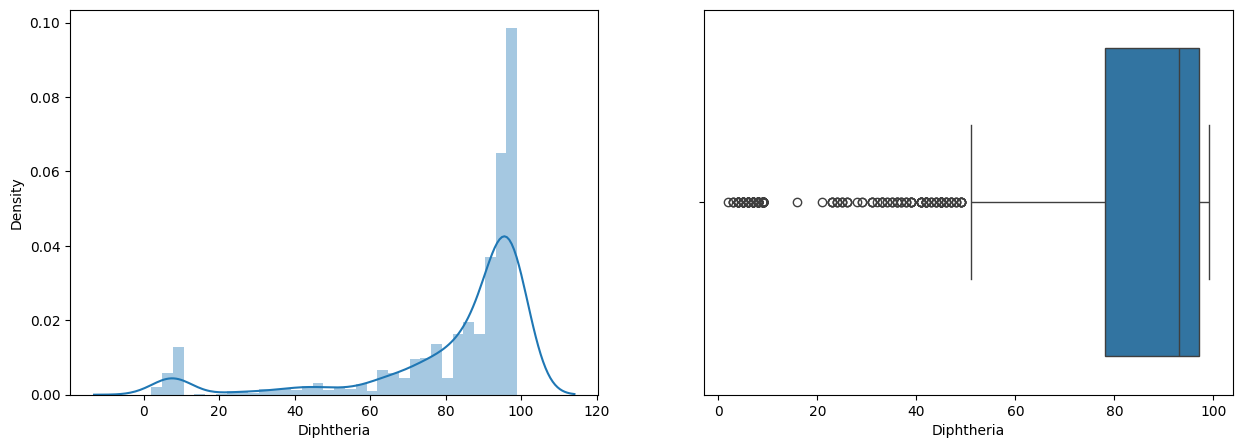

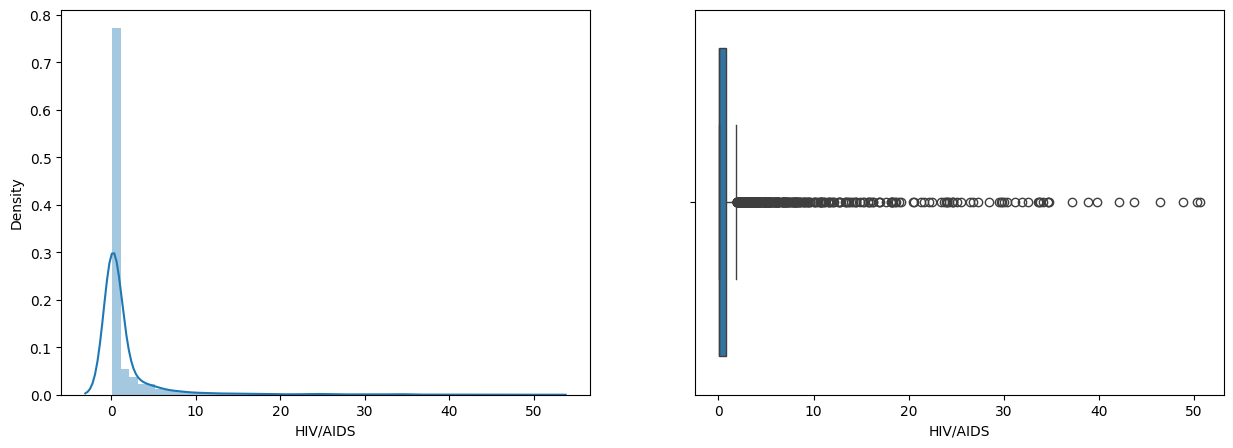

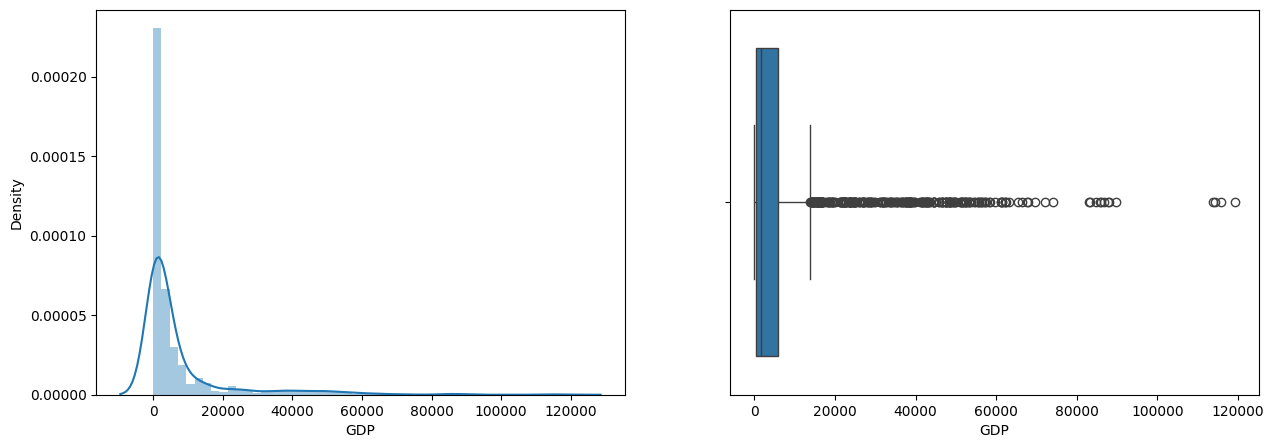

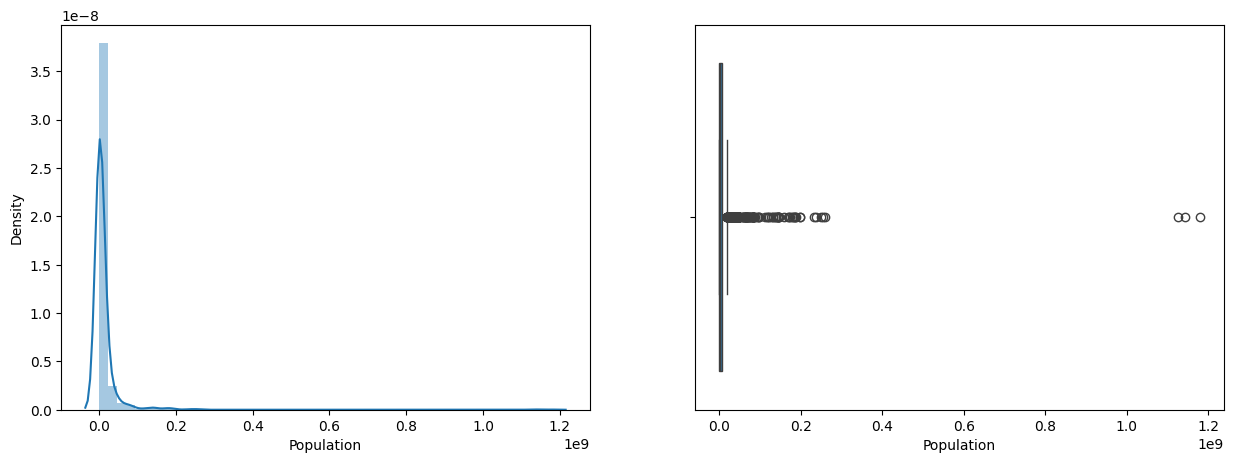

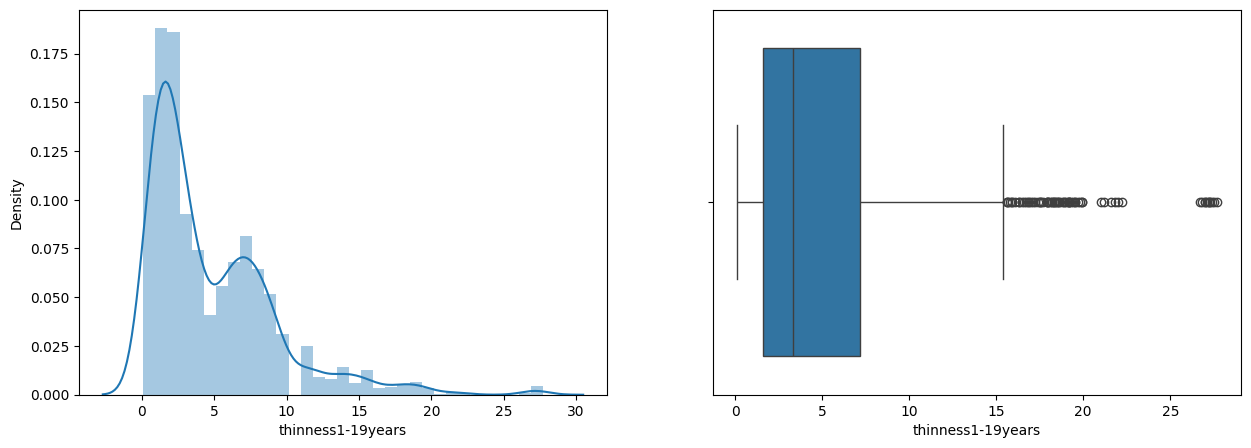

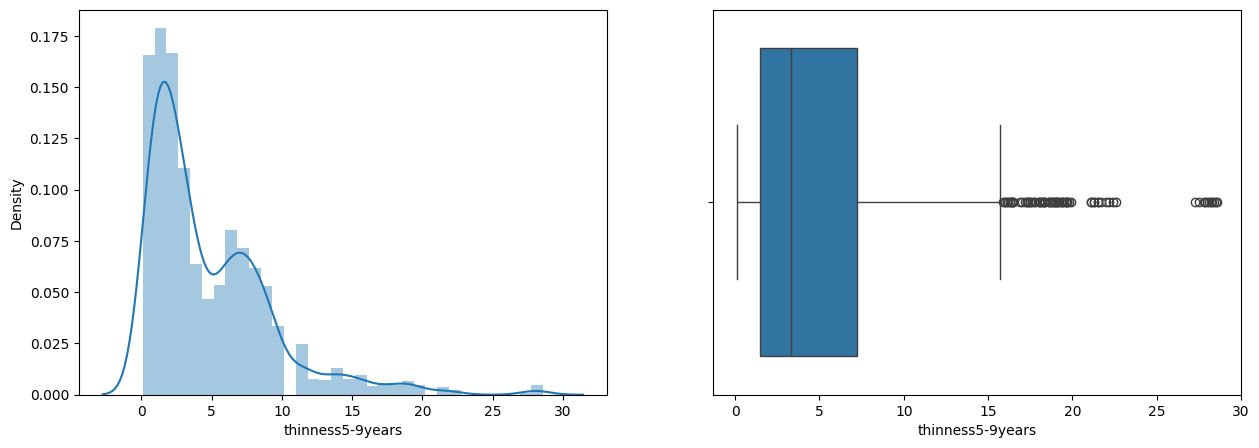

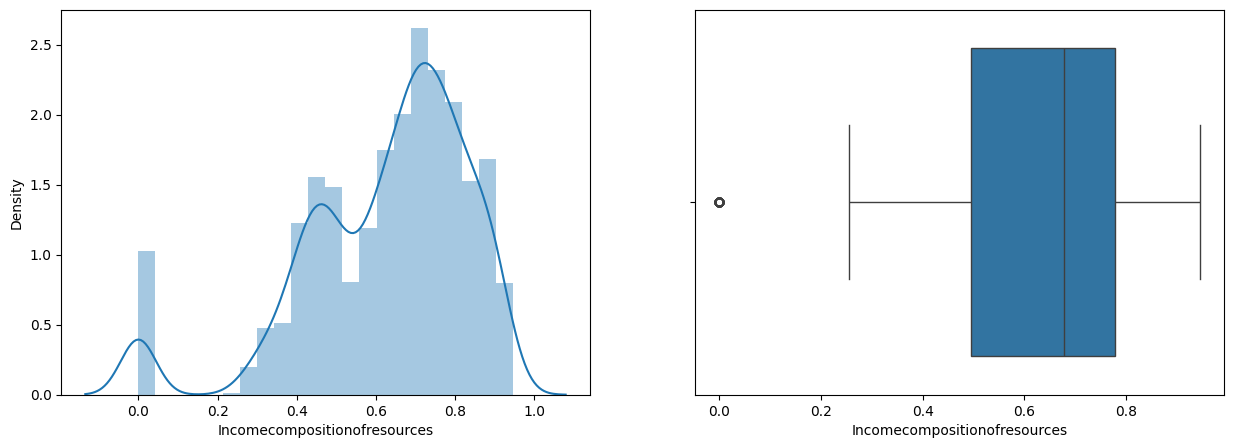

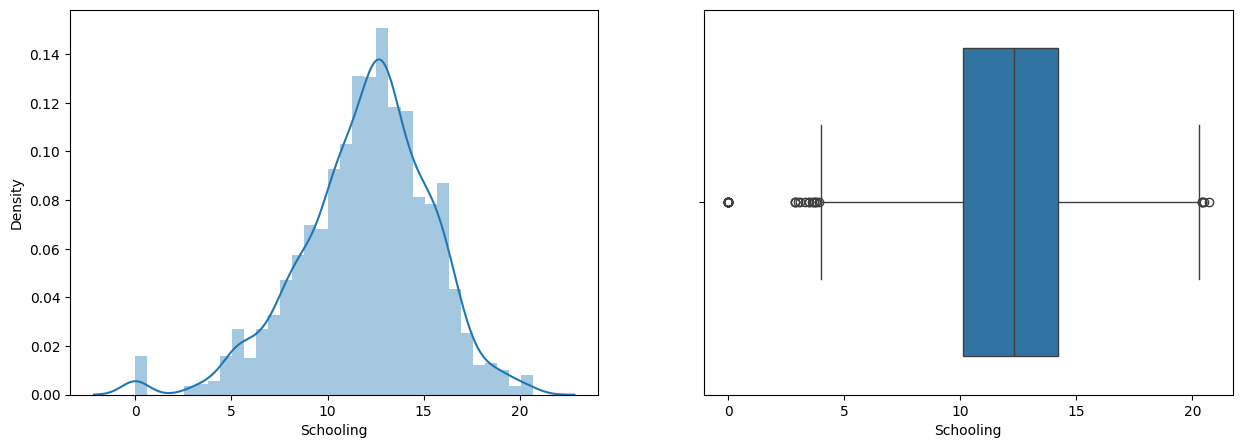

In [21]:
for col in df_train[num_col].drop(columns='Year').columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(df_train[col], ax=ax[0] )
    sns.boxplot(x=df_train[col], ax=ax[1] )

***Numerical Columns over the years***

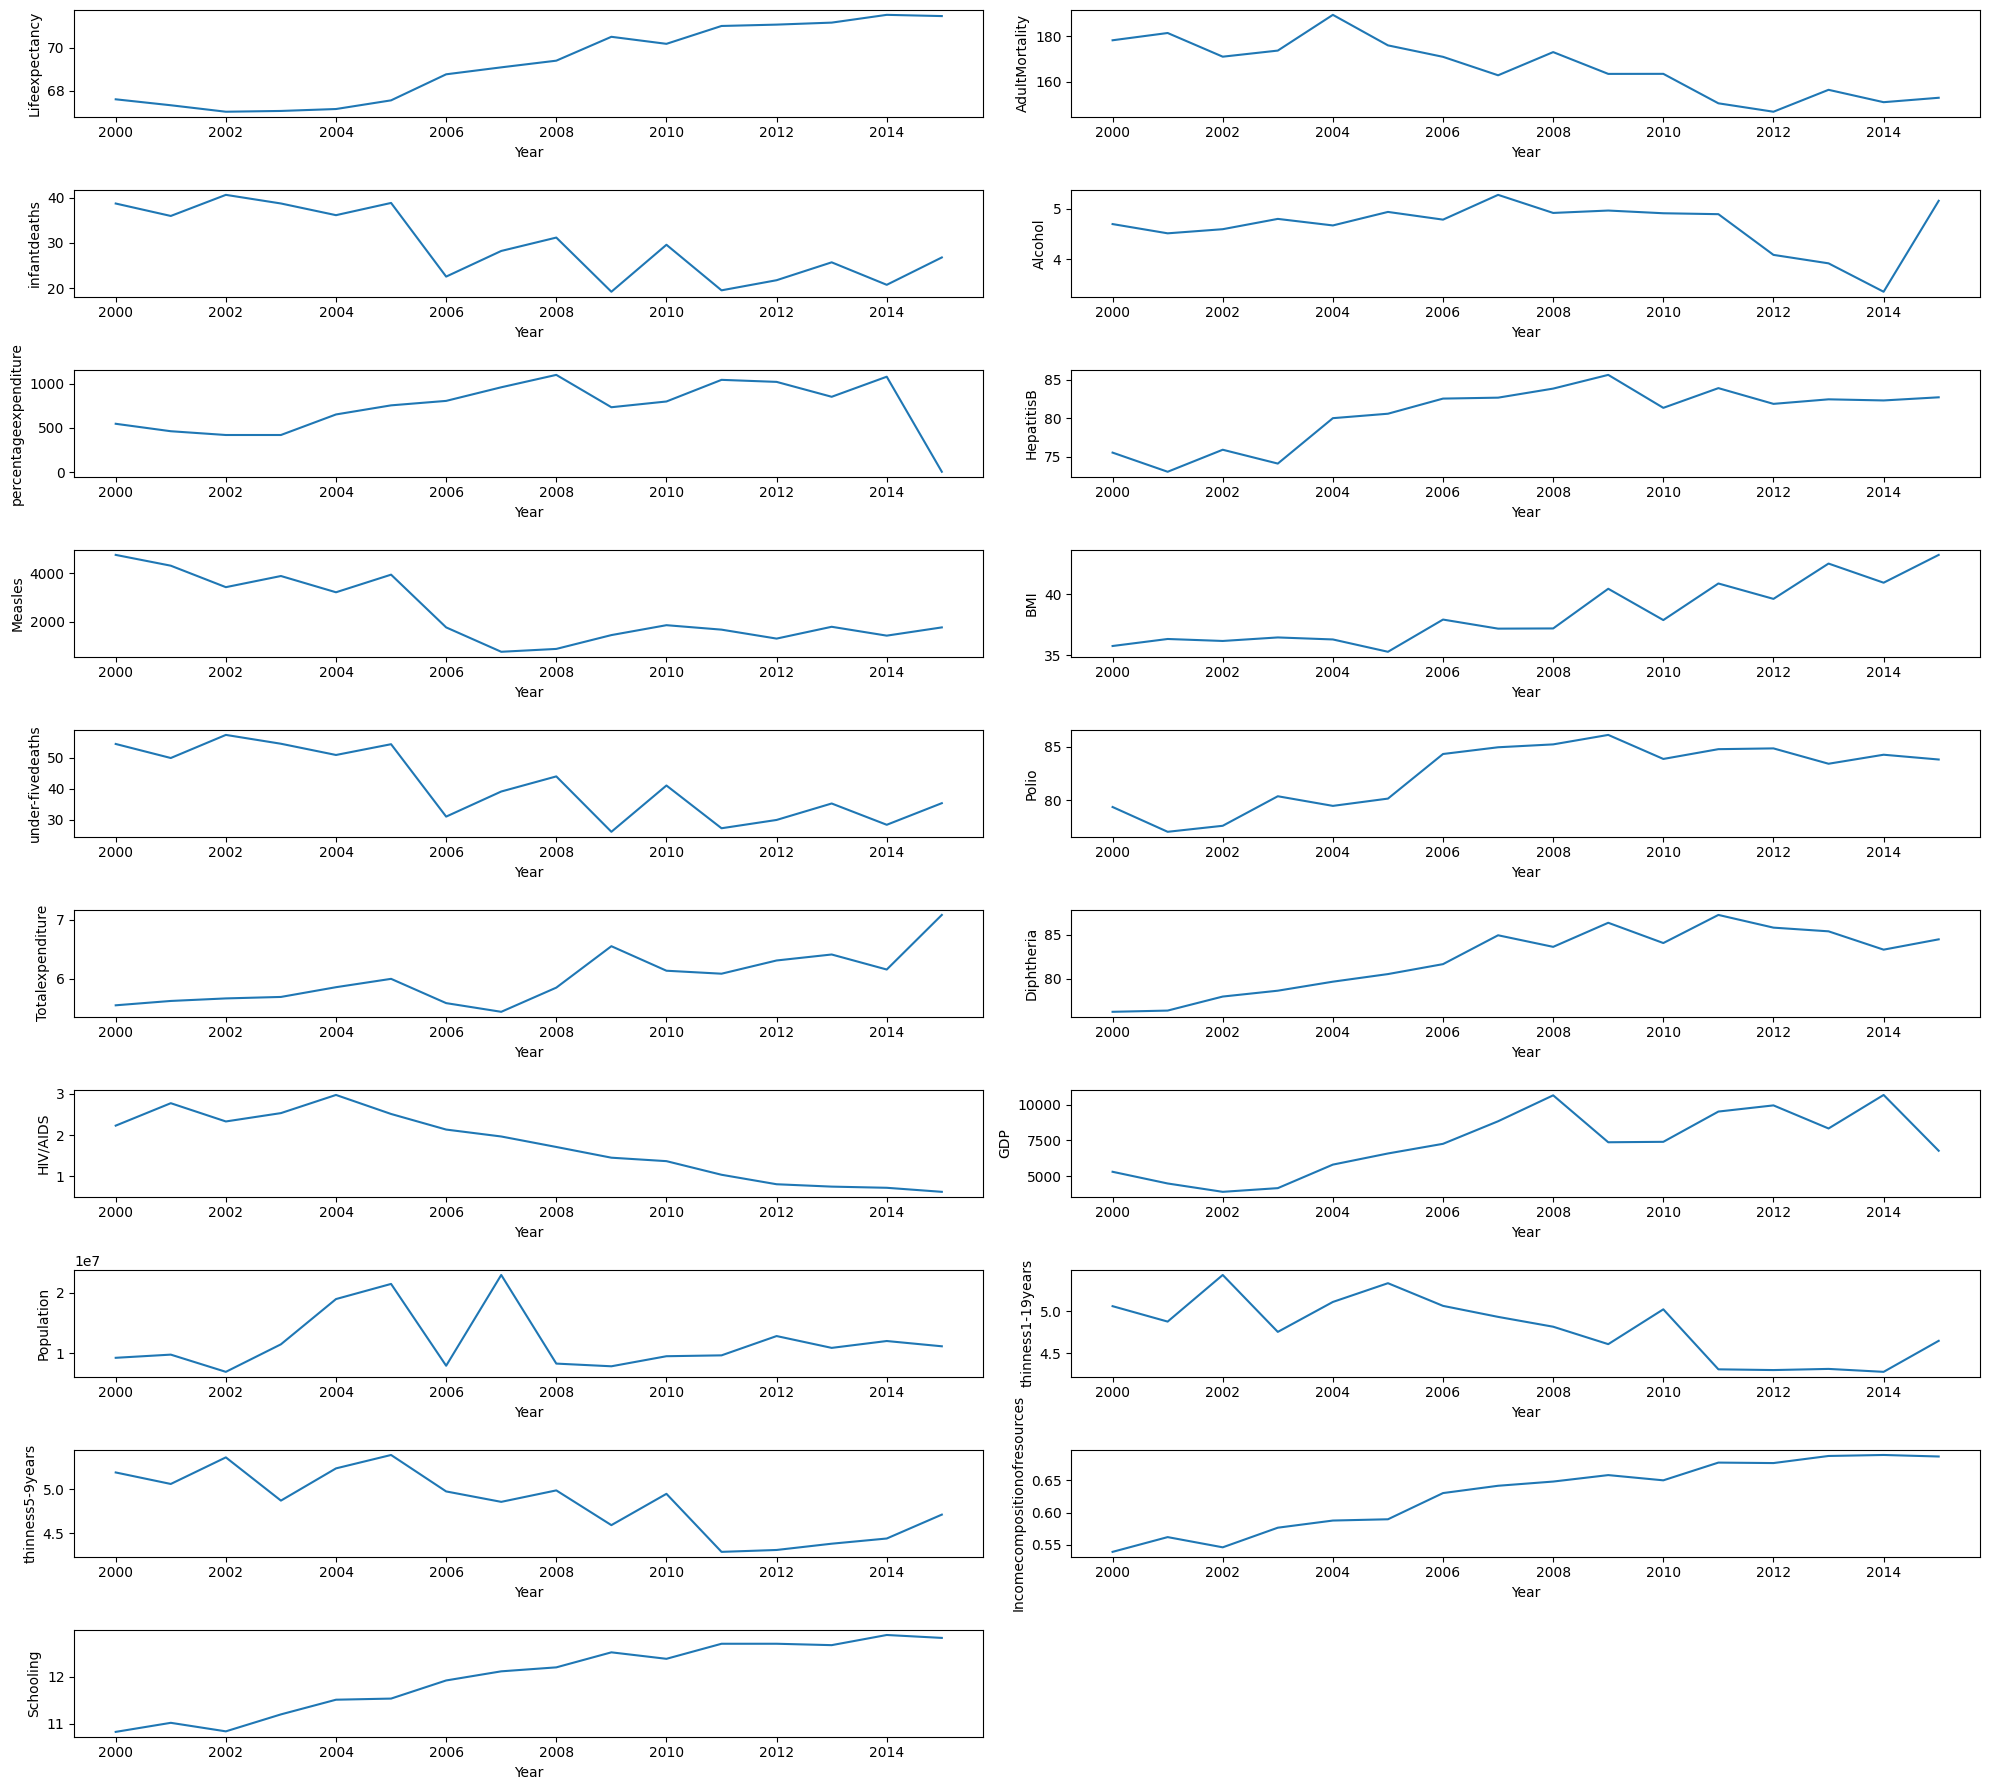

In [22]:
fig,axes=plt.subplots(nrows=len(df_train[num_col].columns)//2 ,ncols=2,figsize=(20,18))
for idx,col in enumerate(df_train[num_col].drop(columns='Year').columns):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Year',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],markers=True,ci=None)
fig.delaxes(axes[9,1])
plt.tight_layout()
plt.show()

***Plot Status Column***

<Axes: ylabel='Status'>

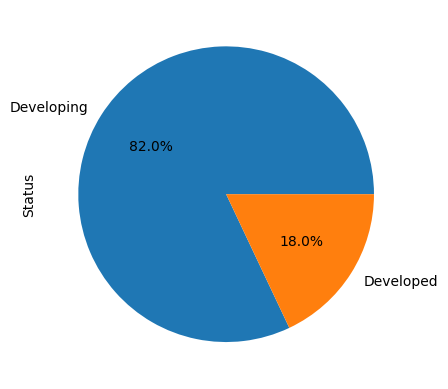

In [23]:
df_train['Status'].value_counts().plot.pie(autopct='%1.1f%%')

***Coleinarity plot***

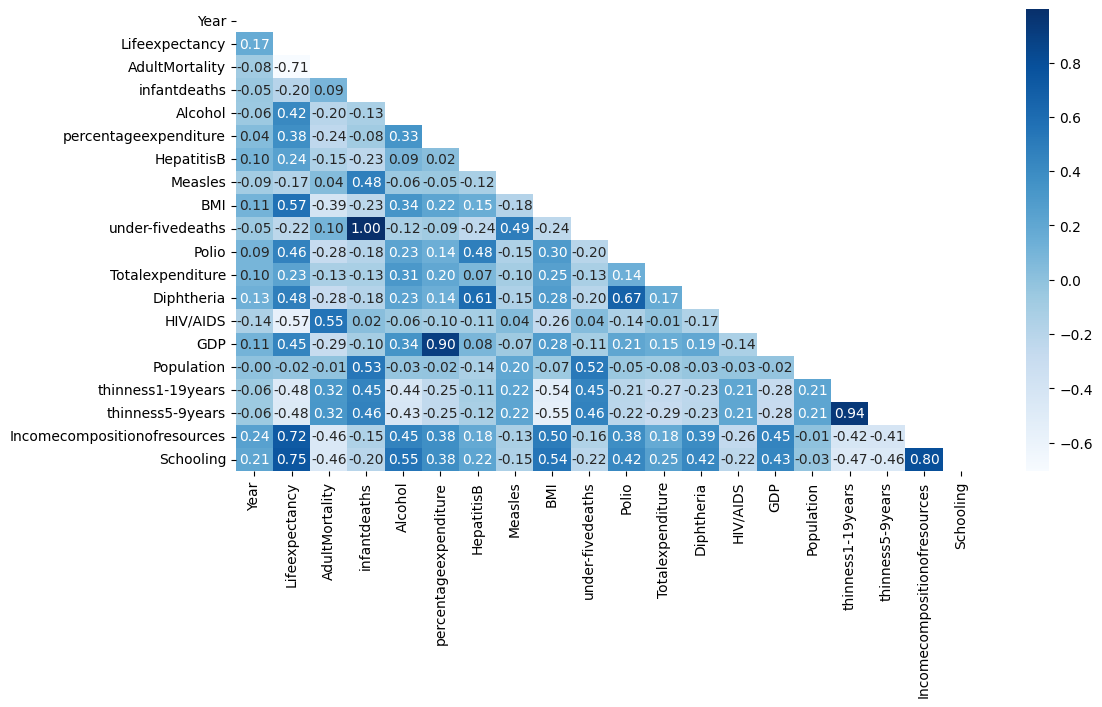

In [24]:
corr = df_train.corr()
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True,mask=mask, cmap='Blues', fmt='.2f')
plt.show()

From Prevoius plot we got alot of information

1.Life Expectancy and the population rose over the years

2.The More Gdp and Total Expendture the more the life expectany rate

3.The Thiness 1-19 and Thiness 5-9 have the same distribution so we will likley chose one of them for our model

4.The more the country is vacinated the more the life expectancy

5.The BMI Column is not making Sense our median BMI is about 50 that means that more than half the population of our data  is severly obese and in need of medical care

6.Under 5 death and infant death are practically the same column so we choose the more genralized column the under 5 column

In [25]:
df['BMI'].describe()

count    2888.000000
mean       38.228913
std        20.013652
min         1.000000
25%        19.300000
50%        43.200000
75%        56.100000
max        87.300000
Name: BMI, dtype: float64

In [26]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

***Dropping High Correlation Columns and Columns that are not making sense***

In [27]:
df_train.drop(columns=['thinness5-9years','BMI','infantdeaths'],inplace=True)
df_test.drop(columns=['thinness5-9years','BMI','infantdeaths'],inplace=True)

***Machine Learning Preprocessing***

In [34]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor

In [37]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 23.1 MB/s eta 0:00:00


In [33]:
!pip install lazypredict


***Encoding Country Column***

In [44]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
def map_country2continent(cname:str):
  try:
    code = country_alpha2_to_continent_code(country_name_to_country_alpha2(cname))
    continent = convert_continent_code_to_continent_name(code)
    return continent
  except Exception as e:
    if str(e) == '"Invalid Country Alpha-2 code: \'TL\'"':
        continent = 'Asia'
        return continent

In [48]:
df_train['Country'] = 'South Korea'
df_test['Country'] = 'South Korea'

df_train['Continent'] = df_train['Country'].apply(map_country2continent)
df_test['Continent'] = df_test['Country'].apply(map_country2continent)

df_train.drop(columns=['Country'], inplace=True)
df_test.drop(columns=['Country'], inplace=True)

In [49]:
df_train['Continent'].unique()

array(['Asia'], dtype=object)

In [50]:
continent_enc = LabelEncoder()
df_train['Continent'] = continent_enc.fit_transform(df_train['Continent'])
df_test['Continent'] = continent_enc.transform(df_test['Continent'])

***Encoding Year Column***

In [51]:
continent_enc = LabelEncoder()
df_train['Year'] = continent_enc.fit_transform(df_train['Year'])
df_test['Year'] = continent_enc.transform(df_test['Year'])

***Encoding Status Column***

In [52]:
status_enc = LabelEncoder()
df_train['Status'] = status_enc.fit_transform(df_train['Status'])
df_test['Status'] = status_enc.transform(df_test['Status'])

***Handeling the Outliers***

In [53]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

#Outlier Percentage
def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    print("Outliers percentage:", len(outliers)/(dataframe[column].shape[0])*100,"%")
    print("-------------------------")
#Checking Outliers
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False

In [54]:
num_col=[]
cat_col=[]
for col in df_train.columns:
    if df_train[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col)
print(cat_col)
print(num_col)

[]
['Year', 'Status', 'Lifeexpectancy', 'AdultMortality', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'Incomecompositionofresources', 'Schooling', 'Continent']


In [55]:
for col in (df_train[num_col].drop(columns='Year').columns):
    outlier_percentage(df_train,col)

Status
Outliers percentage: 17.971758664955072 %
-------------------------
Lifeexpectancy
Outliers percentage: 0.42789901583226364 %
-------------------------
AdultMortality
Outliers percentage: 2.909713307659392 %
-------------------------
Alcohol
Outliers percentage: 0.0 %
-------------------------
percentageexpenditure
Outliers percentage: 12.794180573384681 %
-------------------------
HepatitisB
Outliers percentage: 8.34403080872914 %
-------------------------
Measles
Outliers percentage: 18.442447582370562 %
-------------------------
under-fivedeaths
Outliers percentage: 13.564398801882755 %
-------------------------
Polio
Outliers percentage: 9.62772785622593 %
-------------------------
Totalexpenditure
Outliers percentage: 1.069747539580659 %
-------------------------
Diphtheria
Outliers percentage: 10.2267864783911 %
-------------------------
HIV/AIDS
Outliers percentage: 18.185708172871202 %
-------------------------
GDP
Outliers percentage: 11.724433033804022 %
--------------

In [56]:
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit

In [57]:
for column in (df_train[num_col].drop(columns='Year').columns):
    replace_with_threshholds(df_train,df_test,column)

    print(column,check_outliers(df_train,column))


Status False
Lifeexpectancy False
AdultMortality False
Alcohol False
percentageexpenditure False
HepatitisB False
Measles False
under-fivedeaths False
Polio False
Totalexpenditure False
Diphtheria False
HIV/AIDS False
GDP False
Population False
thinness1-19years False
Incomecompositionofresources False
Schooling False
Continent False


***Split the Target and the labels***

In [58]:
X_train, y_train = df_train.drop(columns=['Lifeexpectancy']), df_train['Lifeexpectancy']
X_test, y_test = df_test.drop(columns=['Lifeexpectancy']), df_test['Lifeexpectancy']

***Pipeline***

In [59]:
num_attribs=df_train[num_col].drop(columns=['Year','Lifeexpectancy','Continent','Status']).columns
cat_attribs=['Status','Continent', 'Year']

In [60]:
cat_attribs

['Status', 'Continent', 'Year']

In [61]:
num_pipeline=make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'))
preprocessing=ColumnTransformer([
     ('num',num_pipeline,num_attribs),
     ('cat',cat_pipeline,cat_attribs)
     ])

In [62]:
X_1=pd.DataFrame(preprocessing.fit_transform(X_train))
X_1_test=pd.DataFrame(preprocessing.transform(X_test))

In [63]:
X_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.94,-0.71,-0.73,0.67,-0.66,-0.72,0.67,-0.07,0.68,-0.63,2.24,-0.46,-0.63,1.49,1.07,1.00,0.00,15.00
1,2.17,-0.19,-0.73,0.02,1.01,0.51,0.04,-0.07,0.04,-0.05,-0.70,-0.58,0.70,-1.05,-0.82,1.00,0.00,15.00
2,1.06,-1.16,-0.73,0.08,-0.66,-0.47,0.10,0.03,0.11,1.91,-0.82,-0.42,0.77,-1.13,-0.95,1.00,0.00,12.00
3,-1.38,-1.09,-0.66,0.41,1.89,2.05,-2.27,0.43,-2.27,1.91,-0.79,-0.55,1.69,-1.72,-2.30,1.00,0.00,1.00
4,-0.31,-0.19,-0.73,0.73,0.05,0.72,0.74,-0.07,0.74,-0.63,-0.44,-0.46,2.43,0.22,0.17,1.00,0.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,-1.16,-1.16,-0.57,-2.52,-0.56,-0.23,-2.27,-1.09,-2.27,0.96,-0.53,-0.63,0.93,-0.74,-1.37,1.00,0.00,12.00
2333,1.08,-0.35,-0.59,-0.18,-0.59,-0.43,-0.21,0.35,-0.15,1.91,-0.71,-0.67,0.85,-1.18,-1.01,1.00,0.00,10.00
2334,0.89,0.39,-0.58,0.41,-0.66,0.22,-1.48,-0.14,-1.42,1.91,-0.70,0.92,-0.12,-0.91,-1.17,1.00,0.00,7.00
2335,0.03,-0.28,-0.33,-2.52,-0.66,-0.68,0.86,-0.57,0.68,1.91,-0.07,-0.24,-0.70,0.31,-0.05,1.00,0.00,3.00


In [64]:
X_1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [65]:
y_train.fillna(y_train.median(),inplace=True)
y_test.fillna(y_train.median(),inplace=True)

***Feature Importance***

In [66]:
#Split your data into Train and validation Data
X_train_1,X_valid,y_train_1,y_valid=train_test_split(X_1,y_train,test_size=0.2,random_state=42)
#Create and train a Random Forest regressor
model=RandomForestRegressor(random_state=42)
model.fit(X_train_1,y_train_1)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [67]:
feature_importance_df

,Feature,Importance
9,Totalexpenditure,0.59
13,Population,0.16
0,Year,0.15
14,thinness1-19years,0.02
12,GDP,0.01
5,HepatitisB,0.01
1,Status,0.01
17,Continent,0.01
7,under-fivedeaths,0.01
6,Measles,0.00


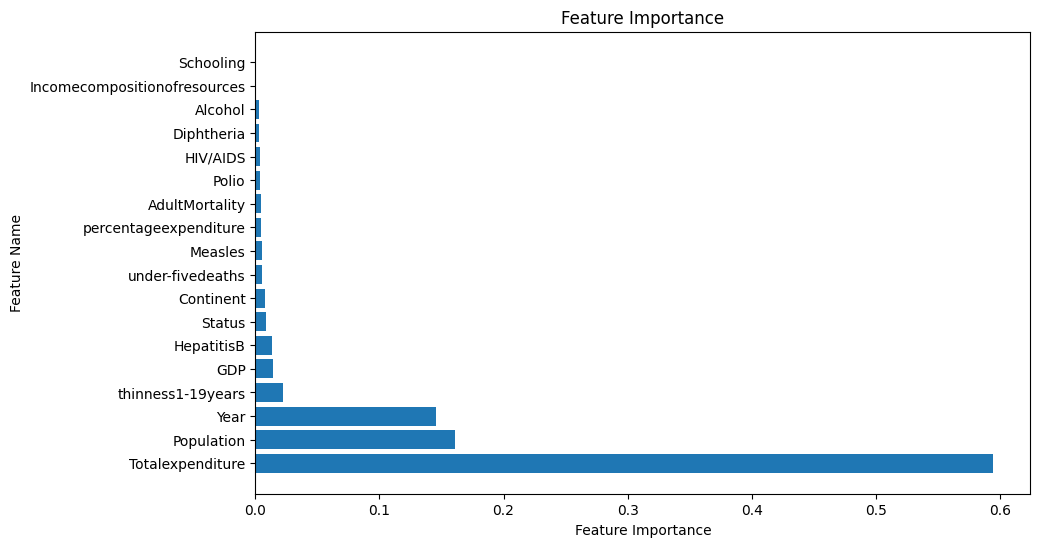

In [68]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

***Modeling***

In [69]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor

In [70]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42)
]

for model in models:
    model.fit(X_1 , y_train)
    y_pred = model.predict(X_1_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))

In [71]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df=models_df.sort_values("R2_score", ascending = False)

In [72]:
models_df

,Model-Name,R2_score,RMSE
4,ExtraTreesRegressor,97.00,1.62
2,RandomForestRegressor,95.82,1.91
7,XGBRegressor,95.77,1.92
8,XGBRFRegressor,94.00,2.29
0,GradientBoostingRegressor,93.93,2.30
6,DecisionTreeRegressor,92.14,2.62
5,AdaBoostRegressor,88.96,3.11
1,SVR,84.69,3.66
3,LinearRegression,84.16,3.72


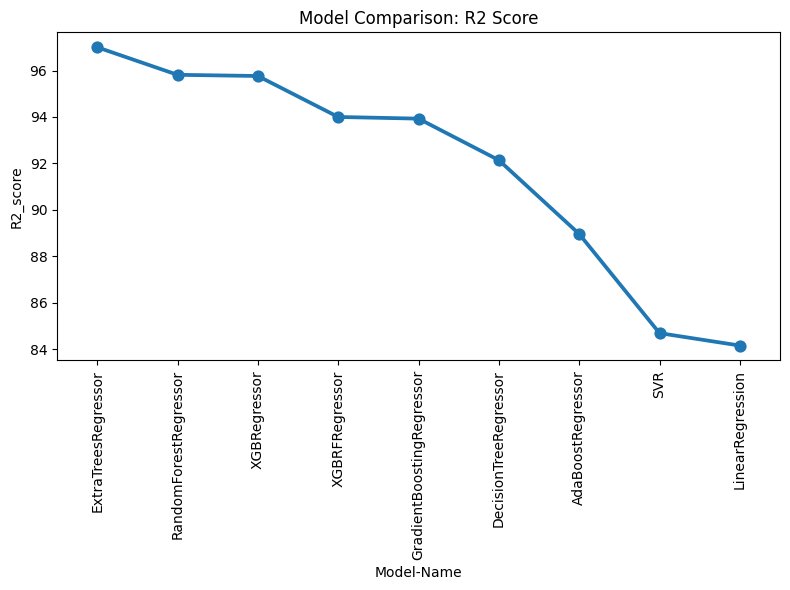

In [73]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

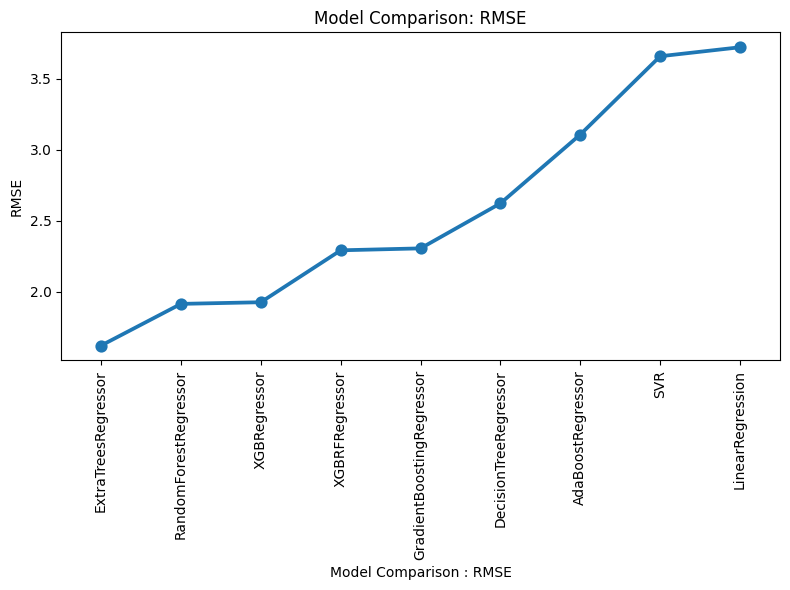

In [74]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model-Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

***Final Model***

In [75]:
fm=ExtraTreesRegressor(random_state=42)

In [76]:
cross_val=cross_val_score(fm,X_valid,y_valid,scoring='r2',cv=20)
cross_val

array([0.90538371, 0.90813821, 0.95767757, 0.9628198 , 0.9402704 ,
       0.93961517, 0.9408518 , 0.92920579, 0.9542501 , 0.88526342,
       0.90767912, 0.91724552, 0.94949921, 0.91842954, 0.96769905,
       0.94392727, 0.96079878, 0.89529118, 0.887839  , 0.99092288])

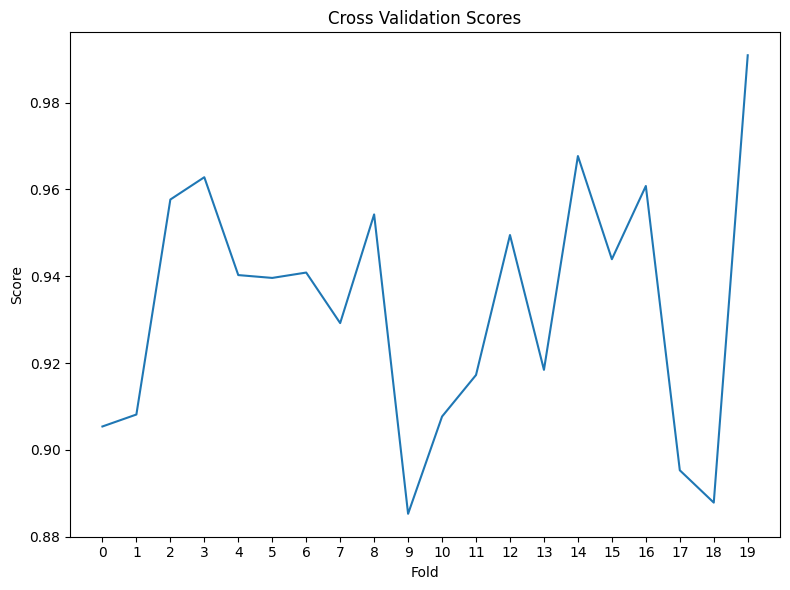

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val)
plt.title("Cross Validation Scores")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.xticks(np.arange(0,20))
plt.tight_layout()
plt.show()

In [78]:
cross_val.max()

0.9909228760073143